In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle


In [3]:
import pandas as pd

In [4]:
import networkx as nx


In [5]:
from collections import Counter, defaultdict
import itertools

# Background

on food

# What I'm Doing

Graph theory and some examples
social network
roads

# Why I'm Doing it

Because ingredients come together as recipes

# Here's What I Did

# Webscraping

# FlavorDB

https://cosylab.iiitd.edu.in/flavordb/entity_details?id=139

Screen cap of this

In [6]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [137]:
# flavorDB["flavor"] = flavorDB.apply(lambda row: Counter(list(itertools.chain.from_iterable(row["flavor_of_molecules"]))), axis=1)

In [158]:
flavorDB.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
127,5ca27ddc13218a1eabac6455,Berry,"[[sweet, new mown hay, green, tonka, bitte...",sea buckthorns,"[323, 107971, 7284, 10448, 7150, 638011, 8468,...","[coumarin, Daidzin, 2-Methylbutyraldehyde, 3-m...","{3-Pentanone, Ethyl Cinnamate, luteolin, 3-(Me...","{61384, 126, 13144, 26447, 7775, 6561, 12293, ...",113
133,5ca27de313218a1eabac645b,Seafood,"[[cherry, caramel, nut, phenolic], [apple, ...",clam,"[14511, 8785, 8193, 8163, 8063, 9862, 7909, 79...","[3-Methyl-2-Cyclohexen-1-One, Benzyl Acetate, ...","{2-Acetylpyrrole, 2-Acetyl-1-methylpyrrole, Oc...","{7909, 32033, 10823, 8163, 6986, 8193, 8027, 5...",61
134,5ca27de513218a1eabac645c,Seafood,"[[coconut, wax, fat, waxy, fatty, earthy,...",crab,"[8193, 8063, 5281, 7909, 7501, 7519, 8051, 188...","[1-Dodecanol, Pentanal, stearic acid, 4-Methyl...","{2-Acetylpyrrole, Octanal, 2-Pentylfuran, 1-No...","{7909, 8193, 11005, 9256, 7720, 996, 5281, 798...",38
135,5ca27de613218a1eabac645d,Seafood,"[[orange, waxy, fresh, fatty, floral, iri...",crayfish,"[8163, 5283321, 7501, 8051, 18635, 7002, 454, ...","[2-Undecanone, trans,trans-2,4-Heptadienal, St...","{Octanal, 1-Nonanol, thiamine, Octan-2-one, 3-...","{8184, 8163, 8027, 9256, 5364919, 14896, 996, ...",32
136,5ca27de713218a1eabac645e,Seafood,"[[sweet, new mown hay, green, tonka, bitte...",kelp,"[323, 107971, 7284, 10448, 7150, 638011, 64373...","[coumarin, Daidzin, 2-Methylbutyraldehyde, 3-m...","{3-Pentanone, palmitic acid, luteolin, 3-(Meth...","{126, 13144, 26447, 6561, 107, 61503, 5318042,...",104


In [140]:
flavorDB.shape

(516, 9)

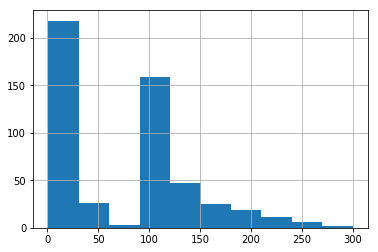

In [159]:
flavorDB["molecule_quantity"].hist()

In [160]:
flavorDB["molecule_quantity"].describe()

count    516.000000
mean      71.538760
std       67.783525
min        1.000000
25%        3.000000
50%       92.000000
75%      110.250000
max      300.000000
Name: molecule_quantity, dtype: float64

In [141]:
flavorDB.groupby("category")["ingredient"].count()

category
Berry                42
Cabbage              16
Fish                120
Fruit                82
Fruit Citrus         10
Fruit Essence         1
Fungus               11
Herb                 51
Meat                 46
Nut                  21
Plant Derivative     20
Seafood              35
Spice                25
Vegetable            24
Vegetable Fruit       4
Vegetable Root        8
Name: ingredient, dtype: int64

In [13]:
list_of_categories = ['Berry', 'Cabbage', 'Fish', 'Fruit', 'Fruit Citrus', 'Fruit Essence', 'Fungus', 'Herb', 'Meat', 'Nut', 'Plant Derivative', 'Seafood', 'Spice', 'Vegetable', 'Vegetable Fruit', 'Vegetable Root']

# Within Category Ratio

In [14]:
"""
takes a while to process, so commented out
"""
# list_of_category_ratios = []
# for category in list_of_categories:
#     if len(ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"]) > 1:
#         list_of_ingredients_per_category = ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"].tolist()
#         ratio_total = 0
#         for combo in combinations(list_of_ingredients_per_category, 2):
#             ratio, x, y, z = common_pair_analysis(combo[0], combo[1])
#             ratio_total += ratio
#         category_ratio = ratio_total / len(list(combinations(list_of_ingredients_per_category, 2)))
#         list_of_category_ratios.append(category_ratio)
#         print("Ratio for {}: ".format(category), category_ratio)

'\ntakes a while to process, so commented out\n'

Ratio for Berry:  0.35719197257990054
Ratio for Fish:  0.41460354837905844
Ratio for Fruit:  0.3786900657335132
Ratio for Fruit Citrus:  0.3884684724638544
Ratio for Fungus:  0.41409691629955947
Ratio for Herb:  0.5326167800571301
Ratio for Meat:  0.13390955730473256
Ratio for Nut:  0.5507713353522316
Ratio for Plant Derivative:  0.09379168158647629
Ratio for Seafood:  0.16144490977143952
Ratio for Spice:  0.4443326703423937
Ratio for Vegetable:  0.5939392378952064
Ratio for Vegetable Root:  0.6347922930979436

Do the ratio for two random ingredients as well

# Making a Graph
graph that has ingredients as nodes and edges if the ratio is above a certain level

simple_graph of two ingredients

In [142]:
my_graph = graph_based_on_shared_molecule_creator(pandas_df= flavorDB, min_intersection_ratio= 0.15)

In [143]:
my_graph.number_of_nodes()

515

In [144]:
my_graph.number_of_edges()

48388

In [145]:
nx.number_connected_components(my_graph)

39

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


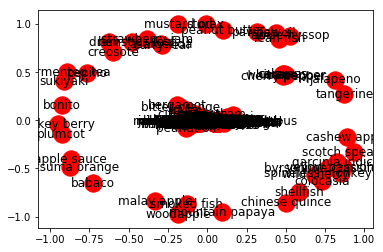

In [146]:
nx.draw_networkx(my_graph)

In [147]:
for comp in nx.connected_components(my_graph):
    print(comp)

{'honey', 'starfruit', 'atlantic herring', 'sea buckthorns', 'yellowtail amberjack', 'snapper', 'beluga whale', 'redskin onion', 'tea leaf willow', 'rhubarb', 'whelk', 'pili nut', 'bitter cherry', 'swamp cabbage', 'kohlrabi', 'american shad', 'clupeinae', 'other fish product', 'sockeye salmon', 'bearded seal', 'cranberry', 'cabbage', 'bowhead whale', 'ham', 'hippoglossus', 'alfalfa', 'cashew nut', 'liqourice', 'radish', 'freshwater drum', 'summer savory', 'jellyfish', 'emu', 'pummelo', 'elk', 'sea cucumber', 'devilfish', 'striped mullet', 'salmonidae', 'sage', 'nutmeg', 'shallot', 'cumin', 'rainbow trout', 'tofu', 'common dab', 'atlantic salmon', 'leather chiton', 'winter savory', 'mint', 'natal plum', 'common ling', 'rock ptarmigan', 'bartlett pear', 'horse', 'allspice', 'crab', 'blueberry', 'lamb', 'lettuce', 'chive', 'cherry', 'litchi', 'irish moss', 'pink salmon', 'lingonberry', 'pheasant', 'thyme', 'groundcherry', 'black crowberry', 'freshwater eel', 'walrus', 'mango', 'truffle', 

# Keep only the biggest connected component

In [148]:
#only keep the biggest connected component
giant = max(nx.connected_component_subgraphs(my_graph), key=len)

In [149]:
nx.number_connected_components(giant)

1

In [150]:
giant.number_of_edges()

48382

In [151]:
giant.number_of_nodes()

472

In [154]:
category_list = []
category_dict = defaultdict(list)


for node in giant.nodes():
    category = giant.nodes[node]["category"]
    category_dict[category].append(node)
    category_list.append(category)

In [161]:
print(Counter(category_list))

Counter({'Fish': 116, 'Fruit': 66, 'Herb': 48, 'Meat': 45, 'Berry': 40, 'Seafood': 34, 'Vegetable': 22, 'Nut': 21, 'Spice': 19, 'Cabbage': 16, 'Plant Derivative': 15, 'Fungus': 11, 'Fruit Citrus': 8, 'Vegetable Root': 8, 'Vegetable Fruit': 2, 'Fruit Essence': 1})


/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


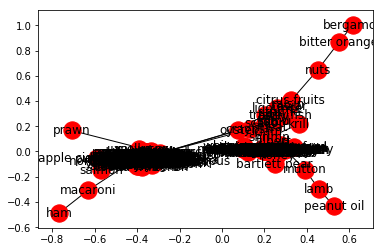

In [162]:
nx.draw_networkx(giant)

In [29]:
degree_dict = dict(giant.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    472.000000
mean     205.008475
std       76.532828
min        1.000000
25%      166.000000
50%      262.000000
75%      262.000000
max      268.000000
dtype: float64

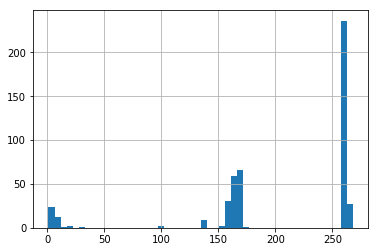

In [30]:
degree_series[degree_series < 400].hist(bins=50)

In [31]:
Counter(nx.degree_centrality(giant)).most_common(5)


[('mushroom', 0.5690021231422505),
 ('peanut', 0.5668789808917197),
 ('pecans', 0.564755838641189),
 ('red currant', 0.5626326963906582),
 ('black currant', 0.5605095541401274)]

# Girvan Newman

In [100]:
with open('./data/graph/ingredients_with_most_shared_molecules.graph', 'wb') as file:
    file.write(pickle.dumps(giant))
    file.close()

In [32]:
pickle_in = open("./data/graph/community_girvan_newman.graph","rb")

#Getting the dictionary from the pickle
girvan_newman = pickle.load(pickle_in)

In [33]:
nx.number_connected_components(girvan_newman)

2

In [34]:
for comp in nx.connected_components(girvan_newman):
    print(comp)

{'epazote', 'apple', 'honey', 'horseradish', 'grape', 'starfruit', 'buckwheat', 'pineappple sage', 'atlantic herring', 'sea buckthorns', 'buffalo currant', 'brazil nut', 'saskatoon berry', 'blackberry', 'dock', 'common persimmon', 'teff', 'musk melon', 'fatty fish', 'red algae', 'rapini', 'soursop', 'purple mangosteen', 'redskin onion', 'tea leaf willow', 'squid', 'rhubarb', 'cassia', 'krill', 'nance', 'durian', 'bitter cherry', 'swamp cabbage', 'pili nut', 'sourdock', 'cherry tomato', 'mixed nuts', 'kohlrabi', 'trassi', 'great horned owl', 'peanut', 'papaya', 'cranberry', 'rosemary', 'cabbage', 'plum', 'cardamom', 'jujube', 'pecans', 'burdock', 'sapodilla', 'cherimoya', 'salmonberry', 'rose hip', 'brussels sprout', 'alfalfa', 'black mulberry', 'cashew nut', 'cinnamon', 'black raspberry', 'water chestnut', 'quince', 'komatsuna', 'naranjilla', 'sweet potato', 'safflower', 'beech nut', 'yellow zucchini', 'guava', 'walnut', 'avocado', 'liqourice', 'radish', 'anise', 'berry', 'acerola', 'm

Image GIRVAN NEWMAN WITH CATEGORIES

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


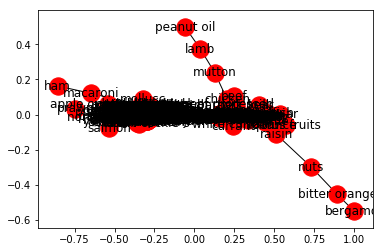

In [163]:
nx.draw_networkx(girvan_newman)

# Graph of Molecules with ingredient edges

In [20]:
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_node(1)
G.add_node('Hello')
G.node[1]["sup"] = 1
G.node[1]["sup"] += 1
G.add_node(1)
G.node[1]

{'sup': 2}

# Recipe Puppy

In [181]:
pickle_in = open("./data/pandas/recipe_puppy_pandas.pickle","rb")

#Getting the dictionary from the pickle
recipe_puppy = pickle.load(pickle_in)

In [182]:
ingredient_list = list(girvan_newman.nodes())

In [183]:
recipe_puppy = recipe_puppy[recipe_puppy["searched_ingredient"].isin(ingredient_list)]

In [184]:
recipe_puppy.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
41303,5caa7ab813218a112b0c38f6,[clam],http://www.grouprecipes.com/12330/bake-clam.html,Bake Clam Recipe,clam
41304,5caa7ab813218a112b0c38f7,"[butter, clam, clams, crackers, onions]",http://cookeatshare.com/recipes/hot-clam-dip-2040,Hot Clam Dip Recipe,clam
41306,5caa7ab813218a112b0c38f9,"[chilli, clam, ginger, salt, water]",http://www.grouprecipes.com/11784/steam-clam.html,Steam Clam Recipe,clam
41308,5caa7ab813218a112b0c38fb,"[butter, clam, clams, cream of celery soup, cr...",http://cookeatshare.com/recipes/crock-pot-clam...,Crock Pot Clam Chowder Recipe,clam
41310,5caa7ab813218a112b0c38fd,"[butter, clam, fettuccine, garlic, lemon juice...",http://find.myrecipes.com/recipes/recipefinder...,Fettuccine with Clam Sauce and Potatoes,clam


In [107]:
recipe_puppy.shape

(63112, 5)

In [108]:
recipe_puppy["searched_ingredient"].unique()

array(['clam', 'crab', 'lobster', 'oyster', 'shrimp', 'caviar', 'codfish',
       'fish', 'salmon', 'apple', 'apricot', 'avocado', 'banana',
       'coconut', 'currant', 'dates', 'kiwifruit', 'mango', 'melon',
       'orange', 'papaya', 'peach', 'pear', 'bartlett pear',
       'prickly pear', 'pineapple', 'plum', 'pumpkin', 'raisin',
       'blackberry', 'cherry', 'raspberry', 'strawberry', 'grapefruit',
       'lemon', 'lime', 'mandarin orange', 'vanilla', 'mushroom', 'basil',
       'chervil', 'coriander', 'dill', 'fennel', 'fenugreek', 'garlic',
       'lemon balm', 'mint', 'rhubarb', 'rosemary', 'sage', 'spearmint',
       'tarragon', 'thyme', 'beef', 'chicken', 'ham', 'lamb', 'pork',
       'turkey', 'almond', 'brazil nut', 'peanut', 'nuts', 'pecans',
       'walnut', 'honey', 'macaroni', 'peanut oil', 'vinegar',
       'star anise', 'cardamom', 'celery', 'cinnamon', 'cumin', 'ginger',
       'marjoram', 'nutmeg', 'oregano', 'parsley', 'pepper', 'saffron',
       'turmeric', 'gree

In [109]:
searched_ingredient_list = list(recipe_puppy["searched_ingredient"].unique())

In [110]:
# Get the ditribution of each category

In [111]:
len(recipe_puppy["searched_ingredient"].unique())

142

recipe_puppy.shape old
(111269, 5)

# Cleaning Up The Data

In [112]:
list_of_recipe_puppy_ingredients = []
for index, row in recipe_puppy.iterrows():
    list_of_recipe_puppy_ingredients += row["recipe_ingredients"]


In [113]:
Counter(list_of_recipe_puppy_ingredients).most_common()

[('salt', 22996),
 ('butter', 15294),
 ('sugar', 13728),
 ('garlic', 12951),
 ('olive oil', 12623),
 ('black pepper', 12414),
 ('onions', 9642),
 ('water', 9612),
 ('flour', 9581),
 ('eggs', 9370),
 ('vegetable oil', 6911),
 ('lemon juice', 6596),
 ('milk', 4937),
 ('parsley', 4893),
 ('cinnamon', 4810),
 ('brown sugar', 4006),
 ('chicken', 3980),
 ('tomato', 3945),
 ('vanilla extract', 3925),
 ('ginger', 3551),
 ('chicken broth', 3467),
 ('celery', 3209),
 ('honey', 3161),
 ('green onion', 3131),
 ('carrot', 3042),
 ('thyme', 2752),
 ('soy sauce', 2728),
 ('heavy cream', 2640),
 ('basil', 2595),
 ('parmesan cheese', 2540),
 ('potato', 2441),
 ('mayonnaise', 2313),
 ('sour cream', 2309),
 ('baking powder', 2295),
 ('white wine', 2284),
 ('nutmeg', 2235),
 ('walnut', 2157),
 ('red pepper', 2102),
 ('cumin', 2072),
 ('lemon', 2071),
 ('apple', 2035),
 ('lime juice', 2014),
 ('shallot', 1999),
 ('rice', 1944),
 ('dijon mustard', 1877),
 ('baking soda', 1843),
 ('mint', 1831),
 ('red onion

In [114]:
new_list_of_ingredients = Counter(list_of_recipe_puppy_ingredients).most_common()[11:]

new_list_of_ingredients

[('lemon juice', 6596),
 ('milk', 4937),
 ('parsley', 4893),
 ('cinnamon', 4810),
 ('brown sugar', 4006),
 ('chicken', 3980),
 ('tomato', 3945),
 ('vanilla extract', 3925),
 ('ginger', 3551),
 ('chicken broth', 3467),
 ('celery', 3209),
 ('honey', 3161),
 ('green onion', 3131),
 ('carrot', 3042),
 ('thyme', 2752),
 ('soy sauce', 2728),
 ('heavy cream', 2640),
 ('basil', 2595),
 ('parmesan cheese', 2540),
 ('potato', 2441),
 ('mayonnaise', 2313),
 ('sour cream', 2309),
 ('baking powder', 2295),
 ('white wine', 2284),
 ('nutmeg', 2235),
 ('walnut', 2157),
 ('red pepper', 2102),
 ('cumin', 2072),
 ('lemon', 2071),
 ('apple', 2035),
 ('lime juice', 2014),
 ('shallot', 1999),
 ('rice', 1944),
 ('dijon mustard', 1877),
 ('baking soda', 1843),
 ('mint', 1831),
 ('red onions', 1814),
 ('cream cheese', 1764),
 ('rosemary', 1733),
 ('bacon', 1727),
 ('bread crumbs', 1705),
 ('spinach', 1692),
 ('shrimp', 1675),
 ('orange juice', 1668),
 ('cornstarch', 1628),
 ('lettuce', 1575),
 ('kosher salt', 

In [115]:

set(list_of_recipe_puppy_ingredients)

{'baguette',
 'biscuit baking mix',
 'honey',
 'vermicelli',
 'colby cheese',
 'soba noodles',
 'biscuit',
 'focaccia bread',
 'seashell pasta',
 'liquor',
 'kernel corn',
 'cornichons',
 'glace cherries',
 'cube vegetable bouillon',
 'rhubarb',
 'chocolate ice cream',
 'beef bouillon granules',
 'sour cherries',
 'pesto',
 'kohlrabi',
 'glycerin',
 'breadcrumbs',
 'celeriac',
 'cashew nut',
 'dry pasta',
 'turkey cutlets',
 'tomatillo',
 'ducks',
 'tomato soup',
 'radish',
 'fenugreek seeds',
 'pecan',
 'currant jelly',
 'env',
 'chili pepper',
 'prune',
 'hamburger bun',
 'almond milk',
 'dark raisin',
 'shallot',
 'cream of wheat',
 'cumin',
 'milk chocolate chips',
 'anchovy paste',
 'frying oil',
 'green tea bags',
 'quinces',
 'orange juice concentrate',
 'mint',
 'fusilli pasta',
 'candy corn',
 'queso fresco',
 'burgers',
 'garlic salt',
 'pippin apples',
 'graham flour',
 'corn starch',
 'onion seeds',
 'anjou pear',
 'beet greens',
 'guacamole',
 'pepperoni',
 'lamb',
 'cavat

In [116]:
uniqeue_list_of_recipe_puppy_ingredients = list(set(list_of_recipe_puppy_ingredients))

In [117]:
in_search = []
not_in_search = []
for ingredient in new_list_of_ingredients:
    ingredient_split_list = ingredient[0].split()
    for ing in ingredient_split_list:
        if ing in searched_ingredient_list:
            in_search.append(ing)
        else:
            not_in_search.append(ing)

In [118]:
in_search

['lemon',
 'parsley',
 'cinnamon',
 'chicken',
 'vanilla',
 'ginger',
 'chicken',
 'celery',
 'honey',
 'onion',
 'carrot',
 'thyme',
 'basil',
 'nutmeg',
 'walnut',
 'pepper',
 'cumin',
 'lemon',
 'apple',
 'lime',
 'mint',
 'rosemary',
 'spinach',
 'shrimp',
 'orange',
 'lettuce',
 'oregano',
 'pepper',
 'lime',
 'lemon',
 'pineapple',
 'mushroom',
 'banana',
 'coriander',
 'almond',
 'leek',
 'sage',
 'tarragon',
 'avocado',
 'chocolate',
 'orange',
 'vinegar',
 'beef',
 'cherry',
 'turkey',
 'ham',
 'lamb',
 'pepper',
 'garlic',
 'coconut',
 'tofu',
 'pork',
 'eggplant',
 'mango',
 'capers',
 'peach',
 'vinegar',
 'fish',
 'salmon',
 'nuts',
 'pepper',
 'pepper',
 'nuts',
 'apricot',
 'oyster',
 'mushroom',
 'vinegar',
 'lemon',
 'pork',
 'cardamom',
 'vinegar',
 'butternut',
 'saffron',
 'orange',
 'pumpkin',
 'dill',
 'raspberry',
 'strawberry',
 'peanut',
 'rhubarb',
 'pear',
 'orange',
 'pecans',
 'raisin',
 'lobster',
 'macaroni',
 'crab',
 'dill',
 'vanilla',
 'beef',
 'black

In [119]:
len(set(not_in_search))

1052

In [120]:
not_in_search

['juice',
 'milk',
 'brown',
 'sugar',
 'tomato',
 'extract',
 'broth',
 'green',
 'soy',
 'sauce',
 'heavy',
 'cream',
 'parmesan',
 'cheese',
 'potato',
 'mayonnaise',
 'sour',
 'cream',
 'baking',
 'powder',
 'white',
 'wine',
 'red',
 'juice',
 'shallot',
 'rice',
 'dijon',
 'mustard',
 'baking',
 'soda',
 'red',
 'onions',
 'cream',
 'cheese',
 'bacon',
 'bread',
 'crumbs',
 'juice',
 'cornstarch',
 'kosher',
 'salt',
 'green',
 'cheddar',
 'cheese',
 'zest',
 'cilantro',
 'cream',
 'powdered',
 'sugar',
 'yogurt',
 'cayenne',
 'sea',
 'salt',
 'egg',
 'whites',
 'paprika',
 'cocoa',
 'powder',
 'egg',
 'yolks',
 'balsamic',
 'nonstick',
 'cooking',
 'spray',
 'tomato',
 'green',
 'beans',
 'red',
 'flakes',
 'pecan',
 'powder',
 'cloves',
 'bread',
 'margarine',
 'sweet',
 'potato',
 'raisins',
 'worcestershire',
 'sauce',
 'chives',
 'red',
 'wine',
 'atlantic',
 'vegetable',
 'broth',
 'hot',
 'sauce',
 'ginkgo',
 'white',
 'pine',
 'salad',
 'greens',
 'yellow',
 'zucchini',
 

In [121]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [122]:
standarize_ingredient_dict = {}
for ing in uniqeue_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
    if king_tup[1] >= 85:
        standarize_ingredient_dict[ing] = king_tup[0]
    
    

In [123]:
standarize_ingredient_dict

{'honey': 'honey',
 'rhubarb': 'rhubarb',
 'cashew nut': 'cashew nut',
 'pecan': 'pecans',
 'cumin': 'cumin',
 'mint': 'mint',
 'lamb': 'lamb',
 'cherry': 'cherry',
 'pheasant': 'pheasant',
 'coriander': 'coriander',
 'apple cider vinegar': 'apple cider vinegar',
 'cocoa butter': 'cocoa butter',
 'eggplant': 'eggplant',
 'peppers': 'pepper',
 'winter squash': 'winter squash',
 'capers': 'capers',
 'plum': 'plum',
 'chicken': 'chicken',
 'catfish': 'catfish',
 'apricot': 'apricot',
 'clam': 'clam',
 'oysters': 'oyster',
 'brazil nuts': 'brazil nut',
 'monkfish': 'monkfish',
 'swordfish': 'swordfish',
 'sweet potato': 'sweet potato',
 'peach': 'peach',
 'peanut oil': 'peanut oil',
 'yellowfin tuna': 'yellowfin tuna',
 'anchovy': 'anchovy',
 'dates': 'dates',
 'mexican oregano': 'mexican oregano',
 'melon': 'melon',
 'vanilla': 'vanilla',
 'sage': 'sage',
 'atlantic salmon': 'atlantic salmon',
 'allspice': 'allspice',
 'crab': 'crab',
 'lettuce': 'lettuce',
 'garlic': 'garlic',
 'onion': 

In [124]:
len(standarize_ingredient_dict)

162

In [125]:
recipe_puppy.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
41303,5caa7ab813218a112b0c38f6,[clam],http://www.grouprecipes.com/12330/bake-clam.html,Bake Clam Recipe,clam
41304,5caa7ab813218a112b0c38f7,"[butter, clam, clams, crackers, onions]",http://cookeatshare.com/recipes/hot-clam-dip-2040,Hot Clam Dip Recipe,clam
41306,5caa7ab813218a112b0c38f9,"[chilli, clam, ginger, salt, water]",http://www.grouprecipes.com/11784/steam-clam.html,Steam Clam Recipe,clam
41308,5caa7ab813218a112b0c38fb,"[butter, clam, clams, cream of celery soup, cr...",http://cookeatshare.com/recipes/crock-pot-clam...,Crock Pot Clam Chowder Recipe,clam
41310,5caa7ab813218a112b0c38fd,"[butter, clam, fettuccine, garlic, lemon juice...",http://find.myrecipes.com/recipes/recipefinder...,Fettuccine with Clam Sauce and Potatoes,clam


In [195]:
def cleaner(row):
    ingredient_list = row["recipe_ingredients"]
    ingredient_list = [standarize_ingredient_dict[ing] for ing in ingredient_list if ing in standarize_ingredient_dict and ing not in ["garlic", "onion"]]
    return ingredient_list

In [196]:
recipe_puppy["recipe_ingredients"] = recipe_puppy.apply(lambda row: cleaner(row), axis=1)

In [197]:
recipe_puppy.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
41303,5caa7ab813218a112b0c38f6,[clam],http://www.grouprecipes.com/12330/bake-clam.html,Bake Clam Recipe,clam
41304,5caa7ab813218a112b0c38f7,"[clam, clam]",http://cookeatshare.com/recipes/hot-clam-dip-2040,Hot Clam Dip Recipe,clam
41306,5caa7ab813218a112b0c38f9,"[clam, ginger]",http://www.grouprecipes.com/11784/steam-clam.html,Steam Clam Recipe,clam
41308,5caa7ab813218a112b0c38fb,"[clam, clam]",http://cookeatshare.com/recipes/crock-pot-clam...,Crock Pot Clam Chowder Recipe,clam
41310,5caa7ab813218a112b0c38fd,"[clam, parsley]",http://find.myrecipes.com/recipes/recipefinder...,Fettuccine with Clam Sauce and Potatoes,clam


In [198]:
with open('./data/pandas/cleaned_up_recipes_pandas.pickle', 'wb') as file:
    file.write(pickle.dumps(recipe_puppy))
    file.close()

In [199]:
pickle_in = open("./data/pandas/cleaned_up_recipes_pandas.pickle","rb")

#Getting the dictionary from the pickle
cleaned_pandas = pickle.load(pickle_in)

In [200]:
cleaned_pandas.head(1000)

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
41303,5caa7ab813218a112b0c38f6,[clam],http://www.grouprecipes.com/12330/bake-clam.html,Bake Clam Recipe,clam
41304,5caa7ab813218a112b0c38f7,"[clam, clam]",http://cookeatshare.com/recipes/hot-clam-dip-2040,Hot Clam Dip Recipe,clam
41306,5caa7ab813218a112b0c38f9,"[clam, ginger]",http://www.grouprecipes.com/11784/steam-clam.html,Steam Clam Recipe,clam
41308,5caa7ab813218a112b0c38fb,"[clam, clam]",http://cookeatshare.com/recipes/crock-pot-clam...,Crock Pot Clam Chowder Recipe,clam
41310,5caa7ab813218a112b0c38fd,"[clam, parsley]",http://find.myrecipes.com/recipes/recipefinder...,Fettuccine with Clam Sauce and Potatoes,clam
41313,5caa7ab813218a112b0c3900,[clam],http://www.recipezaar.com/Grandmas-Clam-Dip-37168,Grandma's Clam Dip,clam
41314,5caa7ab813218a112b0c3901,[clam],http://allrecipes.com/Recipe/Macaroni-and-Whit...,Macaroni and White Clam Sauce,clam
41315,5caa7ab813218a112b0c3902,"[clam, clam]",http://www.cdkitchen.com/recipes/recs/222/NE_C...,N.E. Clam Chowder Recipe,clam
41316,5caa7ab813218a112b0c3903,[clam],"http://www.cooks.com/rec/view/0,191,159184-255...",Clam Chowder Dip,clam
41319,5caa7ab813218a112b0c3906,[clam],"http://www.cooks.com/rec/view/0,1945,155179-23...",Aglia E Olio (Spaghetti And Clam Sauce),clam


In [201]:
ing_list = []
for index, row in cleaned_pandas.iterrows():
    ing_list += row["recipe_ingredients"]

In [202]:
Counter(ing_list).most_common()

[('parsley', 4893),
 ('cinnamon', 4810),
 ('chicken', 3980),
 ('ginger', 3551),
 ('celery', 3209),
 ('honey', 3161),
 ('carrot', 3042),
 ('thyme', 2752),
 ('basil', 2595),
 ('nutmeg', 2235),
 ('walnut', 2157),
 ('cumin', 2072),
 ('lemon', 2071),
 ('almond', 2053),
 ('apple', 2035),
 ('mint', 1831),
 ('pecans', 1773),
 ('rosemary', 1733),
 ('raisin', 1712),
 ('spinach', 1692),
 ('shrimp', 1675),
 ('lettuce', 1575),
 ('oregano', 1548),
 ('lime', 1501),
 ('mushroom', 1484),
 ('pineapple', 1476),
 ('banana', 1348),
 ('coriander', 1334),
 ('leek', 1332),
 ('sage', 1321),
 ('cocoa powder', 1270),
 ('tarragon', 1212),
 ('avocado', 1210),
 ('chocolate', 1203),
 ('orange', 1184),
 ('beef', 1138),
 ('cherry tomato', 1137),
 ('green beans', 1123),
 ('turkey', 1121),
 ('ham', 1109),
 ('lamb', 1106),
 ('sweet potato', 1025),
 ('coconut', 1022),
 ('tofu', 1016),
 ('pork', 1012),
 ('eggplant', 995),
 ('pepper', 976),
 ('mango', 973),
 ('capers', 944),
 ('peach', 931),
 ('fish', 909),
 ('atlantic salm

In [203]:
cleaned_pandas.shape

(63112, 5)

# Text Processing

stop ingredient removal

stemming and lemitization

more nlp stuff

# Graph Building

In [ ]:
#MOBPANDAS

# Graph Analysis

eigen Vector centrality

# Recommender

# Interpretation